In [1]:
import pandas as pd
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
import matplotlib
import matplotlib.pyplot as plt

# データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt

output_notebook()

Loading BokehJS ...

In [30]:
pd.set_option("display.max_columns", 1000)
log = pd.read_csv("~/environment/log.tsv", sep="\t")
events = pd.read_csv("~/environment/events.tsv", sep="\t")
users = pd.read_csv("~/environment/users.tsv", sep="\t")

In [3]:
print(log.shape)
log.head()

(1452089, 7)


,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN
3,1,125296,2017-06-06 14:01:27,1,NaN,NaN,NaN
4,1,125128,2017-06-06 14:03:57,1,NaN,NaN,NaN


In [4]:
log.loc[:,"user_id_str"] = log["user_id"].apply(lambda x:str(x))
log.loc[:,"event_id_str"] = log["event_id"].apply(lambda x:str(x))
log.loc[:,"log_date"] = pd.to_datetime(log["time_stamp"])
log.loc[:,"log_year"] = log.loc[:,"log_date"].apply(lambda x:str(x.year))
log.loc[:,"log_month"] = log.loc[:,"log_date"].apply(lambda x:str(x.month))
log.loc[:,"log_day"] = log.loc[:,"log_date"].apply(lambda x:str(x.day))
log.loc[:,"log_weekday"] = log.loc[:,"log_date"].apply(lambda x:str(x.dayofweek))
log.loc[:,"log_hour"] = log.loc[:,"log_date"].apply(lambda x:str(x.hour))
log.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,user_id_str,event_id_str,log_date,log_year,log_month,log_day,log_weekday,log_hour
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,1,6261,2015-03-19 09:15:50,2015,3,19,3,9
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,1,127600,2017-06-05 12:33:17,2017,6,5,0,12
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,1,127600,2017-06-05 12:37:09,2017,6,5,0,12
3,1,125296,2017-06-06 14:01:27,1,NaN,NaN,NaN,1,125296,2017-06-06 14:01:27,2017,6,6,1,14
4,1,125128,2017-06-06 14:03:57,1,NaN,NaN,NaN,1,125128,2017-06-06 14:03:57,2017,6,6,1,14


In [5]:
data1 = pd.merge(log,events, on="event_id")
data = pd.merge(data1, users, on="user_id")
data = data.rename(columns = {"prefecture_x": "event_prefecture", "prefecture_y":"user_prefecture"})
data.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,user_id_str,event_id_str,log_date,log_year,log_month,log_day,log_weekday,log_hour,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,event_prefecture,first_published_at,female_price,male_price,interest,age,gender,user_prefecture,created_on
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,1,6261,2015-03-19 09:15:50,2015,3,19,3,9,27,39.0,27,39.0,2015-03-22 14:00:00,東京都,NaN,4000.0,6500.0,NaN,34,女性,静岡県,2012-06-26
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,1,127600,2017-06-05 12:33:17,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,1,127600,2017-06-05 12:37:09,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,1,127600,2017-06-05 12:32:04,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,1,127600,2017-06-06 09:37:45,2017,6,6,1,9,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26


In [6]:
data.loc[:,"event_date"] = pd.to_datetime(data["event_start_at"])
data.loc[:,"event_year"] = data.loc[:,"event_date"].apply(lambda x:str(x.year))
data.loc[:,"event_month"] = data.loc[:,"event_date"].apply(lambda x:str(x.month))
data.loc[:,"event_day"] = data.loc[:,"event_date"].apply(lambda x:str(x.day))
data.loc[:,"event_weekday"] = data.loc[:,"event_date"].apply(lambda x:str(x.dayofweek))
data.loc[:,"event_hour"] = data.loc[:,"event_date"].apply(lambda x:str(x.hour))

data.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,user_id_str,event_id_str,log_date,log_year,log_month,log_day,log_weekday,log_hour,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,event_prefecture,first_published_at,female_price,male_price,interest,age,gender,user_prefecture,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,1,6261,2015-03-19 09:15:50,2015,3,19,3,9,27,39.0,27,39.0,2015-03-22 14:00:00,東京都,NaN,4000.0,6500.0,NaN,34,女性,静岡県,2012-06-26,2015-03-22 14:00:00,2015,3,22,6,14
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,1,127600,2017-06-05 12:33:17,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,1,127600,2017-06-05 12:37:09,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,1,127600,2017-06-05 12:32:04,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,1,127600,2017-06-06 09:37:45,2017,6,6,1,9,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10


In [7]:
data.loc[:,"user_date"] = pd.to_datetime(data["created_on"])
data.loc[:,"user_year"] = data.loc[:,"user_date"].apply(lambda x:str(x.year))
data.loc[:,"user_month"] = data.loc[:,"user_date"].apply(lambda x:str(x.month))

data.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,user_id_str,event_id_str,log_date,log_year,log_month,log_day,log_weekday,log_hour,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,event_prefecture,first_published_at,female_price,male_price,interest,age,gender,user_prefecture,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour,user_date,user_year,user_month
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,1,6261,2015-03-19 09:15:50,2015,3,19,3,9,27,39.0,27,39.0,2015-03-22 14:00:00,東京都,NaN,4000.0,6500.0,NaN,34,女性,静岡県,2012-06-26,2015-03-22 14:00:00,2015,3,22,6,14,2012-06-26,2012,6
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,1,127600,2017-06-05 12:33:17,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,1,127600,2017-06-05 12:37:09,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,1,127600,2017-06-05 12:32:04,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,1,127600,2017-06-06 09:37:45,2017,6,6,1,9,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6


In [24]:
data.head(-20)

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,user_id_str,event_id_str,log_date,log_year,log_month,log_day,log_weekday,log_hour,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,event_prefecture,first_published_at,female_price,male_price,interest,age,gender,user_prefecture,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour,user_date,user_year,user_month
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,1,6261,2015-03-19 09:15:50,2015,3,19,3,9,27,39.0,27,39.0,2015-03-22 14:00:00,東京都,NaN,4000.0,6500.0,NaN,34,女性,静岡県,2012-06-26,2015-03-22 14:00:00,2015,3,22,6,14,2012-06-26,2012,6
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,1,127600,2017-06-05 12:33:17,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,1,127600,2017-06-05 12:37:09,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,1,127600,2017-06-05 12:32:04,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,1,127600,2017-06-06 09:37:45,2017,6,6,1,9,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
5,1,127600,2017-06-05 12:31:40,1,NaN,NaN,NaN,1,127600,2017-06-05 12:31:40,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
6,1,127600,2017-06-05 12:31:19,1,NaN,NaN,NaN,1,127600,2017-06-05 12:31:19,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
7,1,127600,2017-06-05 12:31:26,1,NaN,NaN,NaN,1,127600,2017-06-05 12:31:26,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
8,1,127600,2017-06-05 12:30:54,1,NaN,NaN,NaN,1,127600,2017-06-05 12:30:54,2017,6,5,0,12,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
9,1,127600,2017-06-07 14:44:53,1,NaN,NaN,NaN,1,127600,2017-06-07 14:44:53,2017,6,7,2,14,24,36.0,26,38.0,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6


# 各a.t.での年齢の分布

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


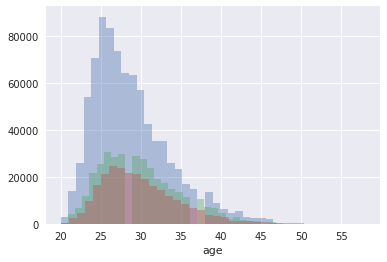

In [8]:
sns.set(color_codes=True)
unique_age_count =  data["age"].nunique()

sns.distplot(data.loc[data["action_type"] == 1,"age"] ,label="actjion_type1",kde=False,bins=unique_age_count)
sns.distplot(data.loc[data["action_type"] == 2,"age"],label="actjion_type2",kde=False,bins=unique_age_count)
sns.distplot(data.loc[data["action_type"] == 3,"age"],label="actjion_type3",kde=False,bins=unique_age_count)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


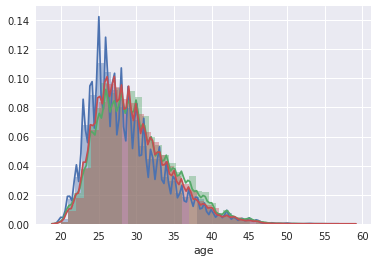

In [9]:

sns.distplot(data.loc[data["action_type"] == 1,"age"] ,label="actjion_type1",bins=unique_age_count)
sns.distplot(data.loc[data["action_type"] == 2,"age"],label="actjion_type2",bins=unique_age_count)
sns.distplot(data.loc[data["action_type"] == 3,"age"],label="actjion_type3",bins=unique_age_count)

# 各a.t.での男女の分布

In [10]:
gender = data.groupby(["gender","action_type"]).count()
gender

user_id  event_id  time_stamp  num_of_people  \
gender action_type                                                 
女性     1             422114    422114      422114              0   
       2             182511    182511      182511              0   
       3             101191    101191      101191         101191   
男性     1             419422    419422      419422              0   
       2             172309    172309      172309              0   
       3             152858    152858      152858         152858   

                    payment_method  total_price  user_id_str  event_id_str  \
gender action_type                                                           
女性     1                         0            0       422114        422114   
       2                         0            0       182511        182511   
       3                    101191       101191       101191        101191   
男性     1                         0            0       419422        419422   
       2                         0            0       172309        172309   
       3                    152858       152858       152858        152858   

                    log_date  log_year  log_month  log_day  log_weekday  \
gender action_type                                                        
女性     1              422114    422114     422114   422114       422114   
       2              182511    182511     182511   182511       182511   
       3              101191    101191     101191   101191       101191   
男性     1              419422    419422     419422   419422       419422   
       2              172309    172309     172309   172309       172309   
       3              152858    152858     152858   152858       152858   

                    log_hour  female_age_lower  female_age_upper  \
gender action_type                                                 
女性     1              422114            422114            420629   
       2              182511            182511            182025   
       3              101191            101191            100885   
男性     1              419422            419422            417468   
       2              172309            172309            171802   
       3              152858            152858            152302   

                    male_age_lower  male_age_upper  event_start_at  \
gender action_type                                                   
女性     1                    422114          421337          422114   
       2                    182511          182190          182511   
       3                    101191          100983          101191   
男性     1                    419422          418496          419422   
       2                    172309          171981          172309   
       3                    152858          152525          152858   

                    event_prefecture  first_published_at  female_price  \
gender action_type                                                       
女性     1                      422114              421383        421359   
       2                      182511              149644        182224   
       3                      101191               71777        101191   
男性     1                      419422              418622        418552   
       2                      172309              135598        172040   
       3                      152858               94958        152748   

                    male_price  interest     age  user_prefecture  created_on  \
gender action_type                                                              
女性     1                421381     63084  422114           422114      422114   
       2                182195     29486  182511           182511      182511   
       3                101170     11492  101191           101191      101191   
男性     1                418952     66165  419422           419422      419422   
       2                172152     26689  172309           17230

In [11]:
gender.loc[(slice("女性"),slice(None)),"user_id"].values

array([422114, 182511, 101191])

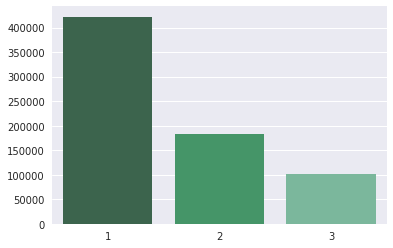

In [12]:
gen = ["女性","男性"]
action =[1,2,3]

sns.barplot(action, gender.loc[(slice("女性"),slice(None)),"user_id"].values, palette="BuGn_d")


In [13]:
gender.loc[(slice("hoge"),slice(None)),:]

,,user_id,event_id,time_stamp,num_of_people,payment_method,total_price,user_id_str,event_id_str,log_date,log_year,log_month,log_day,log_weekday,log_hour,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,event_prefecture,first_published_at,female_price,male_price,interest,age,user_prefecture,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour,user_date,user_year,user_month
gender,action_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## eventは開催と同時に掲載が終わるとすると，評価が変化しうるeventは一部に限られる

In [31]:
data.sort_values(by = ["log_date"], ascending=False).head()
#最新のlogは9/23

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,user_id_str,event_id_str,log_date,log_year,log_month,log_day,log_weekday,log_hour,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,event_prefecture,first_published_at,female_price,male_price,interest,age,gender,user_prefecture,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour,user_date,user_year,user_month
1391448,69657,153730,2017-09-23 21:59:43,1,NaN,NaN,NaN,69657,153730,2017-09-23 21:59:43,2017,9,23,5,21,20,39.0,20,39.0,2017-09-29 20:00:00,東京都,2017-07-25 16:50:34,2000.0,4000.0,その他,26,男性,神奈川県,2017-09-23,2017-09-29 20:00:00,2017,9,29,4,20,2017-09-23,2017,9
1210926,42559,157487,2017-09-23 21:59:35,1,NaN,NaN,NaN,42559,157487,2017-09-23 21:59:35,2017,9,23,5,21,20,35.0,20,35.0,2017-09-24 19:25:00,山口県,2017-08-24 10:27:23,3000.0,7000.0,NaN,35,女性,山口県,2017-03-23,2017-09-24 19:25:00,2017,9,24,6,19,2017-03-23,2017,3
1000768,2001,146232,2017-09-23 21:58:57,1,NaN,NaN,NaN,2001,146232,2017-09-23 21:58:57,2017,9,23,5,21,23,33.0,30,39.0,2017-09-24 17:15:00,大阪府,2017-08-18 14:59:32,1000.0,4500.0,NaN,32,女性,大阪府,2013-11-03,2017-09-24 17:15:00,2017,9,24,6,17,2013-11-03,2013,11
1100479,69654,146393,2017-09-23 21:58:54,1,NaN,NaN,NaN,69654,146393,2017-09-23 21:58:54,2017,9,23,5,21,20,32.0,25,35.0,2017-09-23 19:30:00,東京都,2017-08-21 16:06:42,2000.0,6500.0,NaN,23,男性,東京都,2017-09-23,2017-09-23 19:30:00,2017,9,23,5,19,2017-09-23,2017,9
1391451,69657,158383,2017-09-23 21:58:50,1,NaN,NaN,NaN,69657,158383,2017-09-23 21:58:50,2017,9,23,5,21,24,35.0,25,36.0,2017-09-29 19:30:00,東京都,2017-09-15 09:39:36,3500.0,7000.0,その他,26,男性,神奈川県,2017-09-23,2017-09-29 19:30:00,2017,9,29,4,19,2017-09-23,2017,9


よって，9/23以前に開催したeventは評価が変わらない

In [35]:
events.loc[:,"start_datetime"]  = pd.to_datetime(events["event_start_at"])
important_events = events.loc[events["start_datetime"] > "2017-09-23 21:59:43",:]
display(important_events.head())
print(important_events.shape)



,event_id,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,prefecture,first_published_at,female_price,male_price,interest,start_datetime
143677,143678,32,39.0,36,43.0,2017-09-24 11:00:00,福岡県,2017-08-07 12:29:31,2000.0,3000.0,NaN,2017-09-24 11:00:00
143678,143679,39,46.0,43,50.0,2017-09-30 11:00:00,福岡県,2017-08-07 12:48:29,2000.0,3000.0,NaN,2017-09-30 11:00:00
143687,143688,37,44.0,41,48.0,2017-09-24 13:30:00,福岡県,2017-08-07 12:34:50,2000.0,3000.0,NaN,2017-09-24 13:30:00
143688,143689,32,44.0,36,49.0,2017-09-30 13:30:00,福岡県,2017-08-07 12:53:24,2000.0,3000.0,NaN,2017-09-30 13:30:00
143697,143698,26,41.0,30,45.0,2017-09-24 16:00:00,福岡県,2017-08-07 12:40:09,2000.0,3000.0,NaN,2017-09-24 16:00:00


(2422, 12)


### 上記のイベントが予測する対象である